In [1]:
from absl.testing import absltest
from absl.testing import parameterized
from brax import envs
from brax.training import ppo
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pickle

episode_length = 500
action_repeat = 1
env_name = "acrobot"
save_dir = "save_tune_ppo"


discounting_list = [0.95, 0.99, 0.994]
batch_size_list = [64, 256, 1024]
entropy_cost_list = [1e-2, 1e-3]


from itertools import product

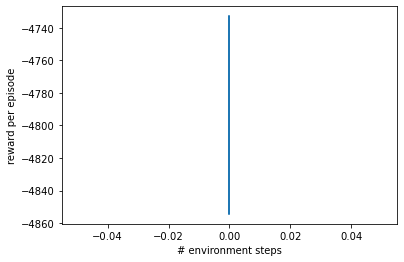

In [9]:
hyper_params = list(product(entropy_cost_list, discounting_list, batch_size_list))
all_rewards = []
for i, (entropy_cost, discounting, batch_size) in enumerate(hyper_params):
    xdata = []
    ydata = []

    def progress(num_steps, metrics):
      xdata.append(num_steps)
      ydata.append(metrics['eval/episode_reward'])
      clear_output(wait=True)
      plt.xlabel('# environment steps')
      plt.ylabel('reward per episode')
      plt.plot(xdata, ydata)
      plt.show()

    inference_fn, params, metrics = ppo.train(
        environment_fn=envs.create_fn(env_name, auto_reset=True),
        num_timesteps = 80_000_000, log_frequency = 20,
        reward_scaling = 1, episode_length = episode_length, normalize_observations = True,
        action_repeat = action_repeat, unroll_length = 50, num_minibatches = 32,
        num_update_epochs = 8, discounting = discounting, learning_rate = 3e-4,
        entropy_cost = entropy_cost, num_envs = 512, batch_size = batch_size, seed = i,
        progress_fn = progress
    )
    #pickle.dump(params, open(f"{save_dir}/{env_name}_params{i}.pkl", 'wb'))
    #pickle.dump(metrics, open(f"{save_dir}/{env_name}_metrics{i}.pkl", 'wb'))
    #pickle.dump(ydata, open(f"{save_dir}/{env_name}_rewards.pkl{i}", 'wb'))
    all_rewards.append(metrics['eval/episode_reward'].item())

top_idx = sorted(range(len(all_rewards)), key=lambda k: all_rewards[k], reverse=True)
print(all_rewards[top_idx[0]])
print(hyper_params[top_idx[0]])

In [22]:
top_idx = sorted(range(len(all_rewards)), key=lambda k: all_rewards[k], reverse=True)
print(all_rewards[top_idx[0]])
print(hyper_params[top_idx[0]])


-4461.755859375
(0.001, 0.99, 256)


In [21]:
for t in hyper_params:
    print(t)